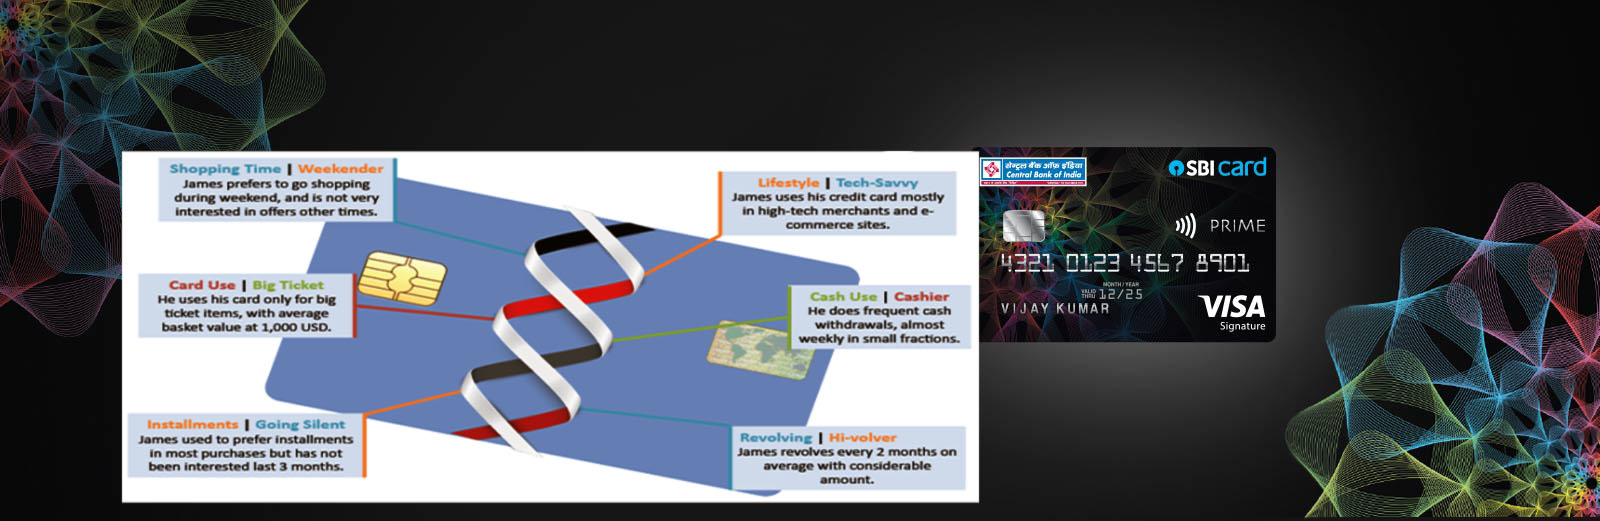

<a id=intro></a>
#        <font color=crimson>      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;          <u>Credit Card Dataset for Clustering using GMM</u>

> ### <font color=crimson><i>Brief Introduction</i> 

Customer segmentation is one of the most fundamental building blocks in getting to know customers. It is essential for industries where customer interaction is frequent and varied, as each interaction provides insight into opportunities and risks for every individual. Customer segmentation can be defined as the action of grouping similar customers into categories with the objective of customizing offerings and actions based on their profiles. The output is a list of customers, each tagged with segment flags using a segmentation ‘model’. The complexity of these models can range from a simple set of business rules – such as customers who haven’t used their cards last year – to sophisticated data mining codes.(Reference:https://forteconsultancy.wordpress.com/2014/09/12/credit-card-customer-segmentation/)

<a id=objectives></a>
### <font color=crimson>Objectives

- A) [Credit Card Customer-Segmentation](#gmm)
- B) [Discover unusual or anomalous customers](#differences)
- C) [Perform more extensive credit-card related analysis with such data](#relation)


***

### <font color=crimson>Contents

* [Brief Introduction](#intro)
* [Objectives](#objectives)
* [Libraries to be used](#libraries)
* [Dataset Description and Usage](#datasetdscr)
* [Field Description and Findings](#fielddscr)
* [Data Cleaning](#dataclean)
* [Missing Values Analysis](#missingval)
* [Missing Values Visualization](#missingvalviz)
* [Filling Missing Values](#fillmissingval)
* [Feature standardization & observation-normalization](#standardization)
* [Visualization - Feature standardization & observation-normalization](#viz_standardization)
    * [Visualization-Distribution Plots](#distplt)
    * [Visualization- Box Plots](#boxplt)
    * [Visualization- Heatmap](#heatmap)
    * [Interpretation](#interpret)
* [GMM Clustering](#gmm)
* [T-SNE](#tsne)
* [Anomalous clients vs Un-anomalous clients -Differences](#differences)
* [Relationships between anomalous & unanomalous variables
](#relation)
* [Conclusion
](#conclusion)

<a id=libraries></a>
### <font color=crimson> Libraries to be used

* Pandas - for dataset handling
* Numpy - Support for Pandas and calculations 
* Matplotlib - for visualization (Plotting graphs)
* Plotly - for interative plots
* Sklearn - for Data Processing and Clustering
* Os - for OS related operations

In [ ]:
%reset -f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans # Class to develop kmeans model
from sklearn import metrics
from sklearn.metrics import silhouette_score # base for clustering
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.mixture import GaussianMixture 

# Use white grid plot background from seaborn
sns.set(font_scale=0.5, style="ticks")
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
import warnings
import os
%matplotlib inline
plt.rcParams.update({'figure.max_open_warning': 0}) #just to suppress warning for max plots of 20
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)
#os.chdir("../input/ccdata/")
#os.listdir()            # List all files in the folder

In [ ]:
# Display output not only of last command but all commands in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Set pandas options to display results
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

<a id=datasetdscr></a>
### <font color=crimson>Dataset Description and Usage

The case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of around 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables. The dataset consists of 18 features about the behaviour of credit card customers. These include variables such as the balance currently on the card, the number of purchases that have been made on the account, the credit limit, and many others

##### Usage
- i) Read Dataset into a DataFrame. Let us call this DataFrame as, 'cc'
- ii) Change column names of 'cc' to lowercase unless you are comfortable otherwise.
- iii) Drop cust_id column as it is of no help in aggregate analysis.
- iv) Missing values filling:
    - a) Check how many columns have missing values. We will fill them.
    - b) Two columns have some missing values. Findout which ones. 
- v) Plot distribution plots of the these two columns having missing data using sns.distplot(). After looking at the                distribution plots of the two features, take a decision whether to fill NaN with column mean or column median.
- vi) Feature standardization & observation-normalization: First, standardise all features using sklearn's StandardScaler(). This is column-wise standardization. Also row-wise normalize each observation using sklearn's normalize() function. Use default parameter values for both.
- vii) Final output ie output of normalize() is a numpy array ('out' in the above code).Transform 'out' to a pandas DataFrame and assign column names as in our DataFrame, cc. Let us call this dataframe as: df_out
- viii) Graphing: All columns in this dataframe (df_out) have proper names assigned (para vii above). The dataset offers a rich opportunity to draw graphs and understand interaction of features. Especially, use distplots, jointplots, violin plots or boxplots for (and between) various features. In fact, draw distplots for all features (using plt.subplots() and for-loop ) and draw a few combinations of jointplots. Interpret these graphs.Interpretation is important even though it may be just one-liner.
- ix) How many GMM clusters? Perform GMM clustering. Use 'bic' and 'aic' values to decide how many GMM clusters. 3-clusters would be OK.
- x) Perform GMM clustering with number of clusters as three.
- xi) TSNE--Check if your clusters do not overlap:TSNE is an important technique to check if clusters do form cohesive gropus. Perform TSNE on this data and color points in TSNE graph as per values in gm.predict(data), ie colour point depending upon which point belongs to which cluster. TSNE plot will show clearly three distinct sets of Clusters. This implies that clustering has been proper. But is it perfect? The task of interpretation of clusters does remain and interpretation will decide if clustering is perfect or not. Interpretation is the job of domain expert.
- xii) Anomalous clients vs Un-anomalous clients--differences: Discover anomalous clients ie with density less than 4%. Result will be a numpy array (say, 'anomalies'). Discover un-anomalous clients ie those with density greater than 4%. Result will be another numpy array (say, 'unanomalous ').       Transform both anomalous numpy array and unanomalous numpy array to two pandas DataFrames with column names as in para(ii).
- xiii) Densityplots to distinguish anomalous from normal:Plot densityplots for each feature in 'df_anomaly' and 'df_unanomaly'. For the same feature in anomalous data and in           un-anamolous data, densityplots may be drawn on the same axes so that proper comparison can be made as to changes in           density per feature. This will help in proper interpretation of differences between anomalous and un-anomalous (ie             normal) customers. 


In [ ]:
# Load dataset
cc = pd.read_csv("/kaggle/input/ccdata/CC GENERAL.csv")
#Let's try to analyze the dataset based on what is availiable with us
cc.info()
cc.head()
cc.describe()

<a id=fielddscr></a>
<font color="crimson">    
#### Field Description
</font>   
- CUST_ID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in Customer account to make further purchases 
- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment
- CASH_ADVANCE : Cash in advance given by the Customer
- PURCHASES_FREQUENCY : How frequently the Purchases are being made,score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFF_PURCHASES_FREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASES_INSTALLMENTS_FREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASH_ADVANCE_FREQUENCY : How frequently the cash in advance being paid
- CASH_ADVANCE_TRX : Number of Transactions made with "Cash in Advance"
- PURCHASES_TRX : Number of purchase transactions made
- CREDIT_LIMIT : Limit of Credit Card for Customer 
- PAYMENTS : Amount of Payment done by Customer
- MINIMUM_PAYMENTS : Minimum amount of payments made by Customer
- PRC_FULL_PAYMENT : Percent of full payment paid by Customer
- TENURE : Tenure of credit card service for Customer

<font color="crimson"> 
#### Findings from Dataset available:
</font>    
- Average/Mean BALANCE is 1564 
- BALANCE_FREQUENCY is frequently updated on average ~0.87
- PURCHASES average is 1003
- ONEOFF_PURCHASES average is 592
- Average PURCHASES_FREQUENCY is around 0.5
- Average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
- Average CREDIT_LIMIT ~ 4494
- PRC_FULL_PAYMENT is 15%
- Average TENURE is around 12 years

Standard Deviation for 25% of the values is nearly 0 and for 75% of the values is towards higher side, which means that Dataset is right skewed.
    </font>

<a id=dataclean></a>
### <font color=crimson>  Data Cleaning


 <font color="crimson"> <i>Convert the columnn names into Lower-case
    

In [ ]:
cc.columns = [i.lower() for i in cc.columns]
cc.columns

 <font color="crimson"> <i> We can see from the results that all features are numeric except for CUST_ID. Since the 'Customer Id' has no role to play in our future training, we simply delete the feature cust_id.

In [ ]:
del cc['cust_id']
cc.columns

<a id=missingval></a>
### <font color="crimson"> Missing Values Analysis
- Let's first define a Function called 'missing_columns_data'
- Objective of the function is to filter out only those features which have Number of missing values and corresponding           missing percentange    

In [ ]:
def missing_columns_data(data):
    miss      = data.isnull().sum()
    miss_pct  = 100 * data.isnull().sum()/len(data)
    
    miss_pct      = pd.concat([miss,miss_pct], axis=1)
    missing_cols = miss_pct.rename(columns = {0:'Missings', 1: 'Missing pct'})
    missing_cols = missing_cols[missing_cols.iloc[:,1]!=0].sort_values('Missing pct', ascending = False).round(1)
    
    return missing_cols  

missing = missing_columns_data(cc)
missing

#### <font color="crimson">Let's try to find missing values with the help of some visualization

In [ ]:
null_counts = cc.isnull().sum()/len(cc);
plt.figure(figsize=(15,4));
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical');
plt.ylabel('Fraction of Rows with missing data');
plt.bar(np.arange(len(null_counts)),null_counts);

<font color=crimson> 'minimum_payments' has 313 missing values whereas 'credit_limit' feature has only single missing value

<a id=missingvalviz></a>
### <font color="crimson"> Missing Values Visualization
- Let's draw some visualizations of the features arisen as a result of the function 'missing_columns_data()'
- We use Seaborn distplot() function to draw the plots

In [ ]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True);
sns.despine(left=True);

# Plot a kernel density estimate and rug plot
sns.distplot(cc.minimum_payments, hist=True, rug=True, color="r", ax=axes[0, 1]);
sns.distplot(cc.credit_limit, hist=True, rug=True, color="b", ax=axes[0, 0]);

# Plot a filled kernel density estimate
sns.distplot(cc.minimum_payments,  color="g",ax=axes[1, 1]);
sns.distplot(cc.credit_limit, color="m", ax=axes[1, 0]);

plt.setp(axes, yticks=[]);
plt.tight_layout();

 <a id=fillmissingval></a>
 <font color=crimson> Both 'minimum_payments' and 'credit_limit' features are right-skewed. Since both the features are right-skewed, we fill the missing values with median()

In [ ]:
values = { 'minimum_payments' : cc['minimum_payments'].median(),
           'credit_limit' : cc['credit_limit'].median()
          }
cc.fillna(value = values, inplace = True)
missing = missing_columns_data(cc)
missing

<font color=crimson> Now there are no missing values left in the entire dataset

<a id=standardization></a>
### <font color=crimson> Feature standardization & observation-normalization

In [ ]:
# Get column names first
names = cc.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
scaled_df = scaler.fit_transform(cc)
# Converting the numpy array into a pandas DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=names)
# Normalizing the Data 
normalized_df = normalize(scaled_df) #out
# Converting the numpy array into a pandas DataFrame 
df_out = pd.DataFrame(normalized_df,columns=names) # Normalized Dataframe

In [ ]:
df_out.head()

<a id=viz_standardization></a>
### <font color=crimson> Visualization - Feature standardization & observation-normalization

<a id=distplt></a>
### <font color=crimson> Visualization - Distribution Plots

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(18, 18));
for i in range(4):
    for j in range(4):
        sns.distplot(df_out[df_out.columns[4 * i + j]], ax=axs[i,j]);
        sns.despine();
plt.show();
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(4,4));
sns.distplot(df_out.tenure, ax=axs);
sns.despine();
plt.show();

<a id=boxplt></a>
### <font color=crimson> Visualization - Box Plots

In [ ]:
sns.set_style("darkgrid");
plt.figure(figsize=(17,10));
sns.boxplot(data=df_out);
#sns.violinplot(data=df_out);
#sns.stripplot(data=df_out);
plt.xticks(rotation=90);

<a id=heatmap></a>
### <font color=crimson> Visualization - Heatmap

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10));
cor = df_out.corr();
sns.heatmap(cor, annot=True, cmap=plt.cm.PiYG);
plt.title('Correlation Matrix')
plt.show();

<a id=interpret></a>
### <font color=crimson> Interpretation
    - Frequency Related Variables
        - balance_frequency: Balance is not updated frequently
        - purchases_frequency & purchases_installments_frequency: Both are closely related to each other
        - oneoff_purchases_frequency:is closely related to purchases
        - cash_advance_frequency:is closely related to cash_advance_trx
        
    - Other Features
        - cash_advance_trx: No. of Txn made with "Cash in Advance" is nearly equal to Frequeny of cash in advance being paid
        - purchases_trx, purchases, oneoff_purchases_frequency: Have some relation among them. 
        - balance has a higher level of correlation with cash_advance, cash_advance_frequency and credit_limit.
        - payments variable has a high correletion with purchases and oneoff_purchases.
        - tenure has a negative correlation with cash_advance_trx and cash_advance_frequency variables.
         

<a id=gmm></a>
### <font color=crimson> GMM Clustering
Gaussian Mixture Models(GMM):
A probabilistic approach to clustering addressing many of these problems. In this approach we describe each cluster by its centroid (mean), covariance , and the size of the cluster(Weight)

    
##### Bayesian information criterion (BIC) & Akaike information criterion (AIC)
In statistics, the Bayesian information criterion (BIC) is a criterion for model selection among a finite set of models; the model with the lowest BIC is preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).

When fitting models, it is possible to increase the likelihood by adding parameters, but doing so may result in overfitting. Both BIC and AIC attempt to resolve this problem by introducing a penalty term for the number of parameters in the model; the penalty term is larger in BIC than in AIC.
    
This criterion gives us an estimation on how much is good the GMM in terms of predicting the data we actually have. The lower is the BIC, the better is the model to actually predict the data we have. In order to avoid overfitting, this technique penalizes models with big number of clusters. 
Following this criterion, the bigger the number of clusters, the better should be the model. Which means that the penalty BIC criteria gives to complex models do not save us from overfit.

In [ ]:
# How many clusters?
#     Use either AIC or BIC as criterion
#     Ref: https://en.wikipedia.org/wiki/Akaike_information_criterion
#          https://en.wikipedia.org/wiki/Bayesian_information_criterion
#          https://www.quora.com/What-is-an-intuitive-explanation-of-the-Akaike-information-criterion
bic = []
aic = []
for i in range(8):
    gm = GaussianMixture(
                     n_components = i+1,
                     n_init = 10,
                     max_iter = 100);
    gm.fit(df_out);
    bic.append(gm.bic(df_out));
    aic.append(gm.aic(df_out));

In [ ]:
sns.set_style("whitegrid")
# Use white grid plot background from seaborn
sns.set(font_scale=0.5, style="ticks")
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
#Draw aic ,bic on plot to understand

n_clusters=np.arange(0, 8);
fig, ax = plt.subplots(1, 2, figsize=(12,5));

plt.subplot(1, 2, 1);
plt.plot(n_clusters, aic,marker="o", label='AIC');
plt.title("AIC Scores");
plt.xticks(n_clusters);
plt.xlabel("No. of clusters");
plt.ylabel("Scores");
plt.legend();

plt.subplot(1, 2, 2);
plt.plot(n_clusters, bic, marker="o",label='BIC');
plt.title("BIC Scores");
plt.xticks(n_clusters);
plt.xlabel("No. of clusters");
plt.ylabel("Scores");
plt.legend();

plt.show();

We can notice two things. The first is that the curves are fairly smooth and monotone. The second is that the curve follows different slopes in different part of it. Starting from these two observations, the temptation to check where the BIC curve change slope is big. 

In [ ]:
#Gussian Mixture
gm = GaussianMixture(n_components = 3,
                     n_init = 10,
                     max_iter = 100);
gm.fit(df_out);
# Where are the cluster centers
gm.means_
# Did algorithm converge?
gm.converged_
#  How many iterations did it perform?
gm.n_iter_
#  Clusters labels
#gm.predict(df_out)

# Weights of respective gaussians.GMM can also be used as a generator
#to generate data having similar pattern. All three Gaussians may generate data
#as per their specifc pdf (prob density functions). But to generate as per same
#pattern, as the original data, selection of data-sources (the three Gaussian)
#has prob distribution. Weights describe the prob distribution.
#Values of these weights are close to frequency of data-points per cluster
gm.weights_

#  What is the frequency of data-points for the three clusters.
np.unique(gm.predict(df_out), return_counts = True)[1]/len(df_out)

In [ ]:
#Draw scatter plot to visualize the GMM output
fig = plt.figure();

plt.scatter(df_out.iloc[:, 0], df_out.iloc[:, 1],
            c=gm.predict(df_out),
            s=5,cmap =plt.cm.Greens
           );
plt.scatter(gm.means_[:, 0], gm.means_[:, 1],
            marker='>',
            s=100,               # marker size
            linewidths=5,      # linewidth of marker edges
            cmap =plt.cm.Greens
            );
plt.show()

<a id=tsne></a>
### <font color=crimson>T-SNE

In [ ]:
gm = GaussianMixture(
                     n_components = 3,
                     n_init = 10,
                     max_iter = 100)
gm.fit(df_out)

tsne = TSNE(n_components = 2, perplexity=50)
tsne_out = tsne.fit_transform(df_out)
plt.scatter(tsne_out[:, 0], tsne_out[:, 1],
            marker='x',
            s=5,              # marker size
            linewidths=5,      # linewidth of marker edges
            c=gm.predict(df_out)   # Colour as per gmm
            )

In [ ]:
#df_out['cluster'] = gm.predict(df_out)
#len(df_out.cluster.unique())
arr=gm.predict(df_out);
df_cluster=pd.DataFrame(arr,columns=['cluster'])
df_out_cluster = pd.concat([df_out,df_cluster],axis=1)
#df_cluster.head()
df_out_cluster.head()

In [ ]:
# Number of clients by cluster
df_out_cluster['cluster'].value_counts().plot.bar(figsize=(10,5), title='Clusterwise No. of Customers');

df_out_cluster['cluster'].value_counts()

In [ ]:
#pairwise relationships of key_features

key_features = ["balance", "purchases", "cash_advance","credit_limit", "payments", "minimum_payments", "tenure","cluster"]

#key_features.append("cluster")
plt.figure(figsize=(25,25))
sns.pairplot( df_out_cluster[key_features], hue="cluster")

<a id=differences></a>
### <font color=crimson> Anomalous clients vs Un-anomalous clients -Differences

In [ ]:
densities = gm.score_samples(normalized_df)
density_threshold = np.percentile(densities,4)

# anomalies data
anomalies = normalized_df[densities < density_threshold] # Data of anomalous customers
df_anomaly=pd.DataFrame(anomalies,columns=df_out.columns)
# Unanomalous data
unanomalous = normalized_df[densities >= density_threshold] # Data of unanomalous customers
df_unanomaly=pd.DataFrame(unanomalous,columns=df_out.columns)

In [ ]:
#Density Plot Function to draw plots for Anomalous and Un-Anamalous data
def densityplots(df1,df2, label1 = "Anomalous",label2 = "Normal"):
    # df1 and df2 are two dataframes
    # As number of features are 17, we have 20 axes
    fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(18,15))
    ax = axes.flatten()
    fig.tight_layout()
    # Do not display 18th, 19th and 20th axes
    axes[3,3].set_axis_off()
    axes[3,2].set_axis_off()
    axes[3,4].set_axis_off()
    # Below 'j' is not used.
    for i,j in enumerate(df1.columns):
        # https://seaborn.pydata.org/generated/seaborn.distplot.html
        # For every i, draw two overlapping density plots in different colors
        sns.distplot(df1.iloc[:,i],
                     ax = ax[i],
                     kde_kws={"color": "k", "lw": 3, "label": label1},   # Density plot features
                     hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"}) # Histogram features
        sns.distplot(df2.iloc[:,i],
                     ax = ax[i],
                     kde_kws={"color": "red", "lw": 3, "label": label2},
                     hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "b"})


In [ ]:
# Draw density plots now from two dataframes of anomalous dataframe (df_anomaly) and un-anomalous dataframe (df_unanomaly)
densityplots(df_anomaly, df_unanomaly, label1 = "Anomalous",label2 = "Normal")

Feature-wise Analysis can be tabulated as hereunder:

| Feature | Type- Unanamolous | Type- Anamolous |
| --- | --- | --- |
|balance|Slightly More|Less|
|balance_frequency|More|Less|
|purchases|More|Less|
|oneoff_purchases|More|Less|
|installments_purchases|More|Less|
|cash_advance|More|Less|
|oneoff_purchases_frequency|More|Less|
|purchases_installments_frequency|More for Lower Freq||
|cash_advance_frequency|Less|More|
|payments|More|Less|
|minimum_payments|More|Less|
|tenure|More|Less|


In [ ]:
df_anomaly['type'] = 'anomalous'  
df_unanomaly['type'] = 'unanomalous'
df_all = pd.concat([df_anomaly,df_unanomaly])

<a id=relation></a>
### <font color=crimson>Relationships between anomalous & unanomalous variables

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(18, 18));
for i in range(4):
    for j in range(4):
        sns.boxplot(x = df_all['type'],  y = df_all[df_all.columns[4 * i + j]], ax=axs[i,j]);
        sns.despine();
plt.show();
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(4,4));
sns.boxplot(x = df_all['type'],y=df_all.tenure, ax=axs);
sns.despine();
plt.show();

<a id=conclusion></a>
### <font color=crimson>Conclusion

- Cluster 0: This customer group indicates a small group of customers who are small spenders with the lowest minimum payment.
- Cluster 1: These customers purchase frequently with the high cash advance percentage. This group is using their credit cards for a small number of purchases and lower payments/minimum payments.
- Cluster 2 customers have maximum purchases, maximum limits but low cash advances